In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)
import random

SEED = 42

np.random.seed(SEED)
random.seed(SEED)

In [2]:
df = pd.read_csv("../data/processed/adult_cleaned.csv")

In [3]:
X = df.drop("income", axis=1)
y = df["income"].map({"<=50K": 0, ">50K": 1})

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [5]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_train, X_test = X_train.align(
    X_test,
    join="left",
    axis=1,
    fill_value=0
)

In [6]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [7]:
y_pred_gb = gb_model.predict(X_test)

In [8]:
print("Accuracy :", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Accuracy : 0.8621219100261016
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4945
           1       0.78      0.60      0.68      1568

    accuracy                           0.86      6513
   macro avg       0.83      0.77      0.79      6513
weighted avg       0.86      0.86      0.86      6513



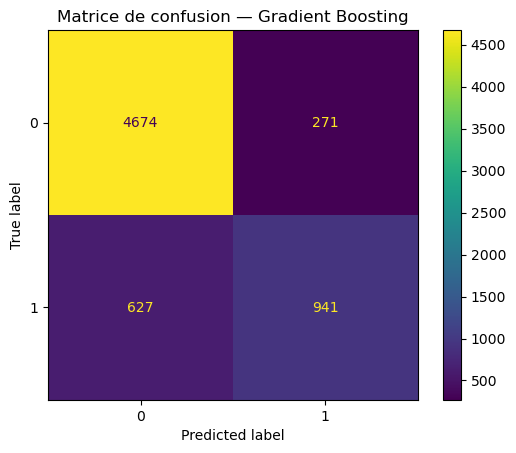

In [9]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gb)
plt.title("Matrice de confusion — Gradient Boosting")
plt.show()

In [10]:
feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": gb_model.feature_importances_
}).sort_values(by="importance", ascending=False)

feature_importance.head(10)

,feature,importance
29,marital.status_Married-civ-spouse,0.382702
3,capital.gain,0.204626
2,education.num,0.195575
0,age,0.060871
4,capital.loss,0.060157
5,hours.per.week,0.036788
36,occupation_Exec-managerial,0.016484
42,occupation_Prof-specialty,0.006996
37,occupation_Farming-fishing,0.005352
40,occupation_Other-service,0.005226


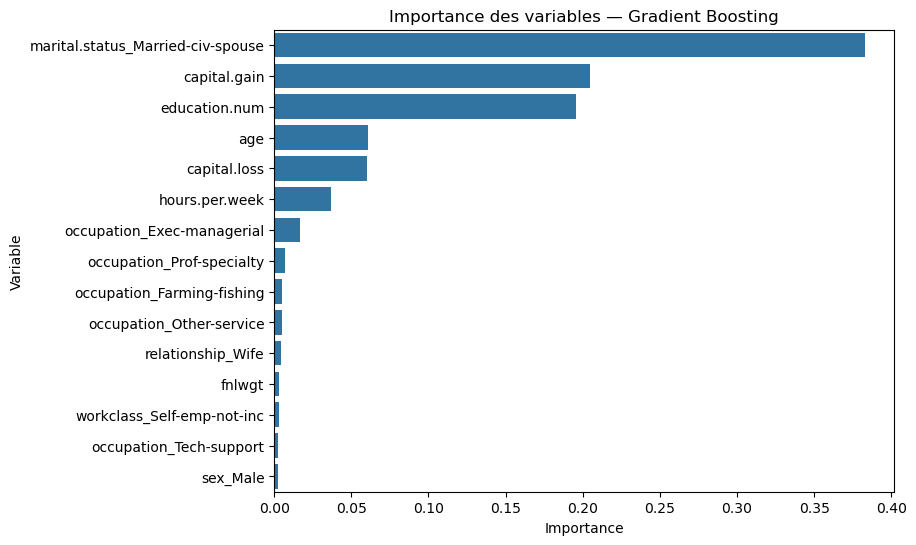

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(
    x="importance",
    y="feature",
    data=feature_importance.head(15)
)
plt.title("Importance des variables — Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.show()

In [12]:
error_rate = (y_test != y_pred_gb).mean()
error_rate

np.float64(0.13787808997389836)

## Explication du modèle — Gradient Boosting

### 1. Ce qu’est le modèle

Le Gradient Boosting est un modèle de classification basé sur une combinaison
séquentielle d’arbres de décision peu profonds. Chaque nouvel arbre est entraîné
pour corriger les erreurs commises par les arbres précédents. Cette approche
permet de construire progressivement un modèle performant en minimisant une
fonction de perte.


### 2. Pourquoi ce modèle a été choisi

Le Gradient Boosting a été choisi car il permet de capturer des relations non
linéaires et des interactions complexes entre les variables, que la régression
logistique ne peut pas modéliser. Il est souvent plus performant sur des jeux
de données structurés comme le dataset Adult Census Income.


### 3. Hypothèses du modèle

Contrairement aux modèles linéaires, le Gradient Boosting ne repose pas sur une
hypothèse de linéarité. Il est peu sensible à l’échelle des variables et tolère
mieux la multicolinéarité. En revanche, il peut être sensible au surapprentissage
si les hyperparamètres ne sont pas correctement choisis.


### 4. Variables les plus importantes

L’importance des variables est évaluée à partir de la contribution de chaque
variable à la réduction de l’erreur dans les arbres de décision. Les résultats
montrent que certaines variables liées à l’éducation, au nombre d’heures
travaillées et au statut professionnel sont particulièrement influentes, ce qui
confirme les observations issues de l’analyse exploratoire.


### 5. Analyse des erreurs

L’analyse des erreurs montre que le Gradient Boosting améliore la classification
de la classe minoritaire par rapport à la régression logistique. Toutefois, le
modèle commet encore des erreurs sur des profils ambigus, dont les caractéristiques
sont proches des deux classes. Ces erreurs sont principalement dues à la complexité
intrinsèque de certaines situations socio-économiques.


### Conclusion — Gradient Boosting

Le Gradient Boosting offre de meilleures performances que la régression logistique
en capturant des relations non linéaires complexes. Il constitue un excellent
compromis entre performance et interprétabilité, et représente une étape
importante avant l’utilisation éventuelle de modèles encore plus complexes.